In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


## EDA

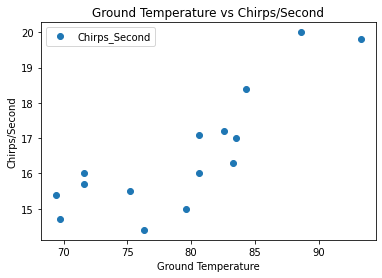

In [5]:
df.plot(x = 'Ground_Temperature', y = 'Chirps_Second', style = 'o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [6]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


There is positive linear relationship between the Chirps_Second and Ground Temperature.Therefore we can go ahead and build linear regression model and there is no need of Transformation

In [7]:
x = df.loc[:,['Ground_Temperature']].values
y = df.loc[:,'Chirps_Second'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [8]:
x_train.shape, x_test.shape

((12, 1), (3, 1))

### Modelling

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

### Task 1

In [10]:
print(regressor.intercept_)

-0.3096122918821571


In [11]:
print(regressor.coef_)

[0.21088052]


In [13]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.2109 * x + -0.3096


### Task 2

In [15]:
y_pred = regressor.predict(x_test) 
y_pred

array([17.46761536, 14.78943279, 14.3887598 ])

In [16]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,18.4,17.467615
1,15.7,14.789433
2,14.7,14.388760


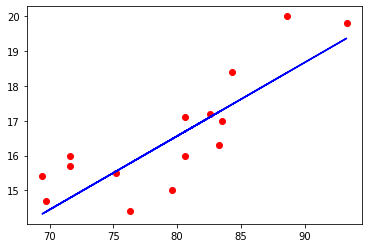

In [17]:
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color='blue')

### Metrics

### Task 3

In [14]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7549575666351982


### Task 4

In [15]:
regressor.predict([[95]])

array([19.7240369])

 At 95˚F, our approximation of chirps/sec is: 19.6921

### Task 5

In [16]:
(18 - regressor.intercept_) / regressor.coef_

array([86.82457953])

With an observation of 18 chirps/sec, we expect a ground temp of 86.21˚F 

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

In [75]:
df = pd.read_fwf("brain_body.txt")

In [76]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


### outlier detection

In [55]:
#IQR
#q3 = df.Body.quantile(0.75)
#q1 = df.Body.quantile(0.25)
#iqr = q3 - q1 

In [56]:
#thresholds
#q3 + (1.5 * iqr)

408.625

In [57]:
#q1 - (1.5*iqr)

-238.375

### Clipping

In [61]:
##df.Body = df.Body.clip(-238.375,408.625)

## EDA

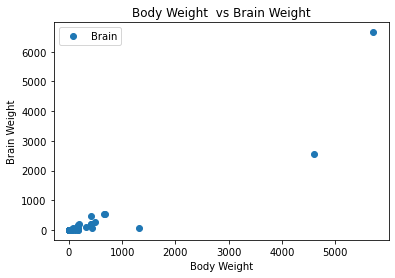

In [77]:
df.plot(x = 'Body', y = 'Brain', style = 'o')
plt.title('Body Weight  vs Brain Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [78]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [79]:
x = df.loc[:,['Body']].values
y = df.loc[:,'Brain'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [80]:
x_train.shape, x_test.shape

((46, 1), (16, 1))

In [81]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

### Task 1

In [82]:
print(regressor.intercept_)

-71.57018864698333


In [83]:
print(regressor.coef_)

[0.90677694]


In [84]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.9068 * x + -71.5702


### Task 2

In [85]:
y_pred = regressor.predict(x_test) 
y_pred

array([522.36870978, -70.48205631, -71.20747787, -48.35669888,
       -64.2252954 , 372.75051399, -69.30324629, -36.02453244,
       -20.79067977,  70.79379159, -60.59818762, -71.34349441,
       -55.70159212,  91.6496613 , -69.39392398, 311.99645873])

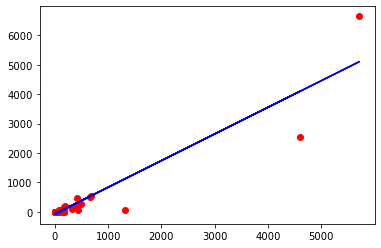

In [86]:
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color='blue')

### Task 3

In [87]:
print('R2- SCORE: ', regressor.score(x, y))

R2- SCORE:  0.8724128730940551


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

In [89]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [90]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [91]:
df.shape

(52, 6)

In [92]:
df.drop_duplicates()
df.shape

(52, 6)

In [93]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


### Task 1

In [94]:
x = df.loc[:,['Sex','Rank','Year','Degree','YSdeg']].values
y = df.loc[:,'Salary'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [95]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [96]:
print('Linear Regression Equation is : y = {:.4f} + {:.4f} x1 + {:.4f} x2 + {:.4f} x3 + {:.4f} x4 + {:.4f} x5 '.format(regressor.intercept_ , regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], regressor.coef_[4]))

Linear Regression Equation is : y = 10647.8563 + 951.3835 x1 + 5762.9071 x2 + 386.1598 x3 + -816.1435 x4 + -61.1187 x5 


### Task 2

In [97]:
y_pred = regressor.predict(x_test)

In [98]:
print('R2- SCORE: ', regressor.score(x, y))

R2- SCORE:  0.8448037606087643


### Task 3

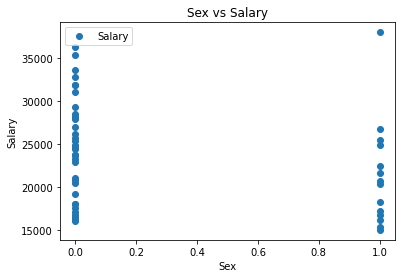

In [99]:
df.plot(x='Sex' , y='Salary', style='o')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.title('Sex vs Salary')
plt.show()

In [100]:
df[['Sex' , 'Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [102]:
num_by_sex = df.Sex.value_counts()
print('men: {}\nwomen: {}'.format(num_by_sex[0], num_by_sex[1]))

men: 38
women: 14


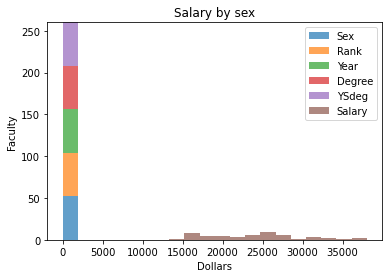

In [105]:
df.pivot_table(index=df.index, columns='Sex', values='Salary')
df.plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

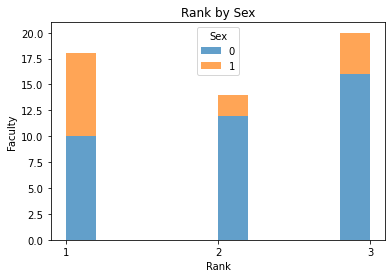

In [104]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

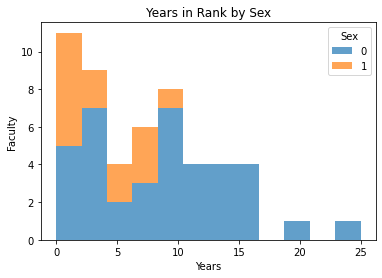

In [106]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

In [107]:
df_10 = df[df['Year'] <= 10]

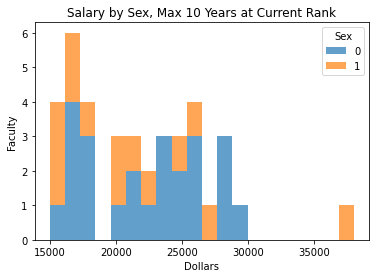

In [109]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

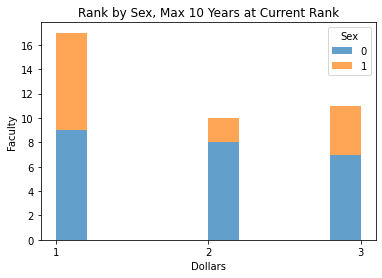

In [115]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

#### There is no correlation with Sex. There is no salary discrimination by Sex.